<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Auto_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AutoETS Model**

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)



##  Read data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Esperanza_vida.csv", usecols=[1,2])
df.head()

,year,value
0,1960-01-01,69.123902
1,1961-01-01,69.760244
2,1962-01-01,69.149756
3,1963-01-01,69.248049
4,1964-01-01,70.311707


In [5]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1960-01-01,69.123902,1
1,1961-01-01,69.760244,1
2,1962-01-01,69.149756,1
3,1963-01-01,69.248049,1
4,1964-01-01,70.311707,1


In [6]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [7]:
df["ds"] = pd.to_datetime(df["ds"])

## Explore data with the plot method

In [8]:
!pip install statsforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


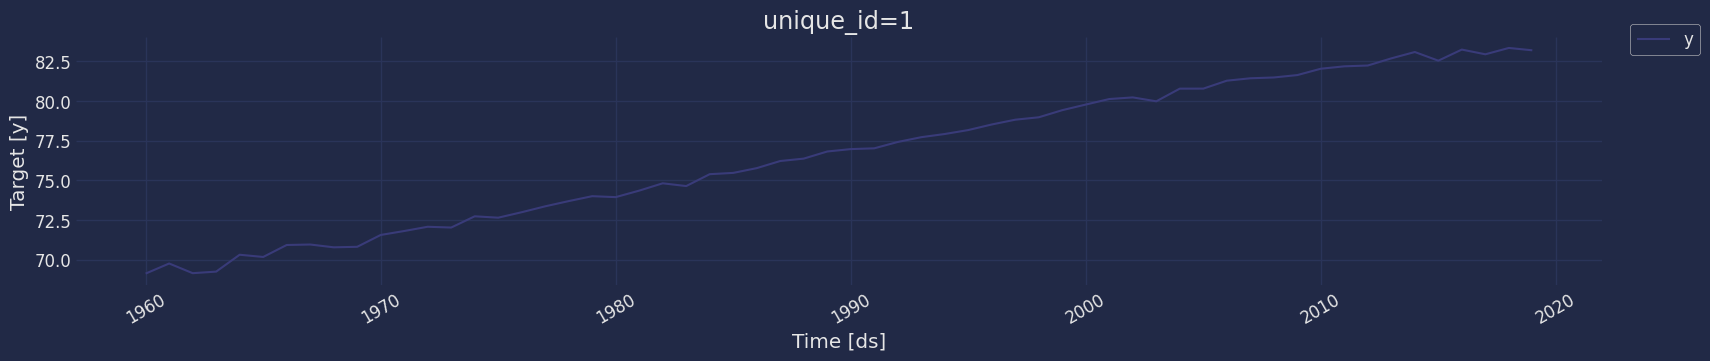

In [9]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

## Autocorrelation plots

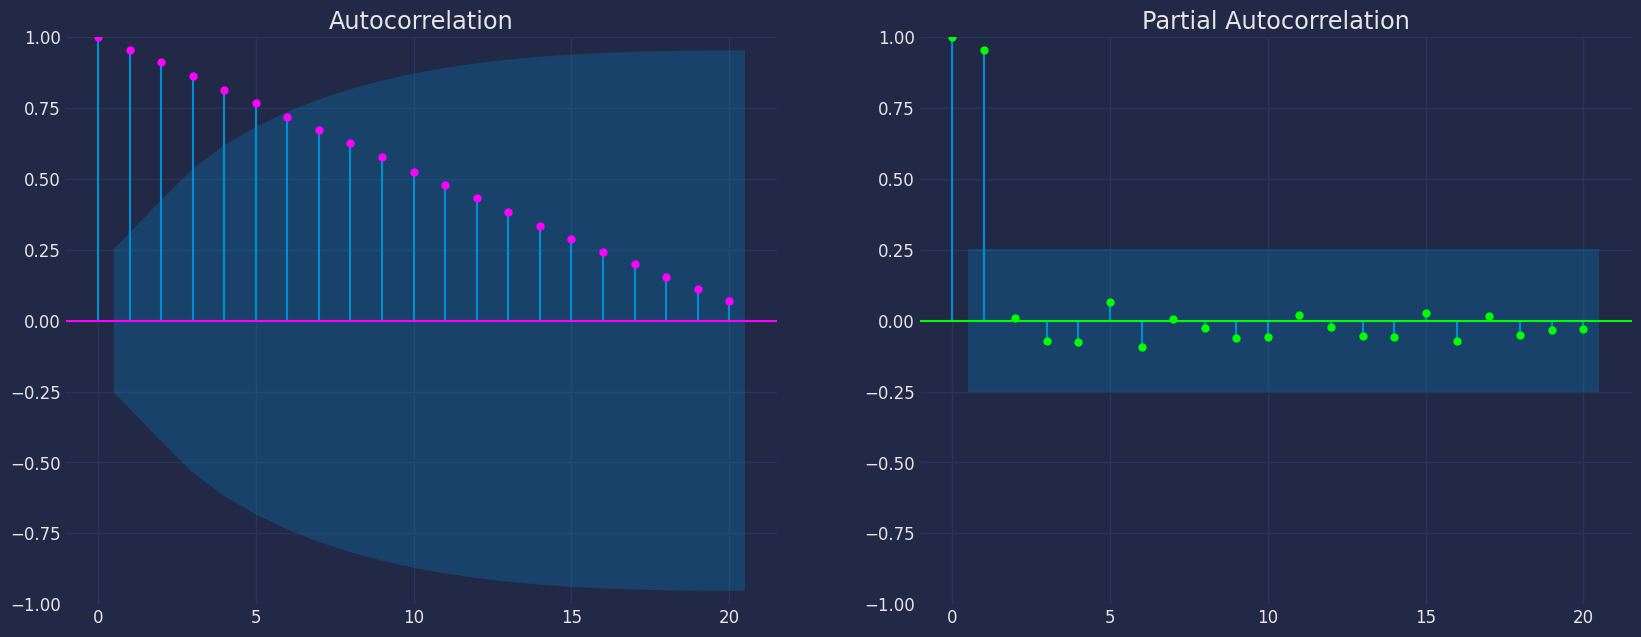

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();


## Decomposition of the time series


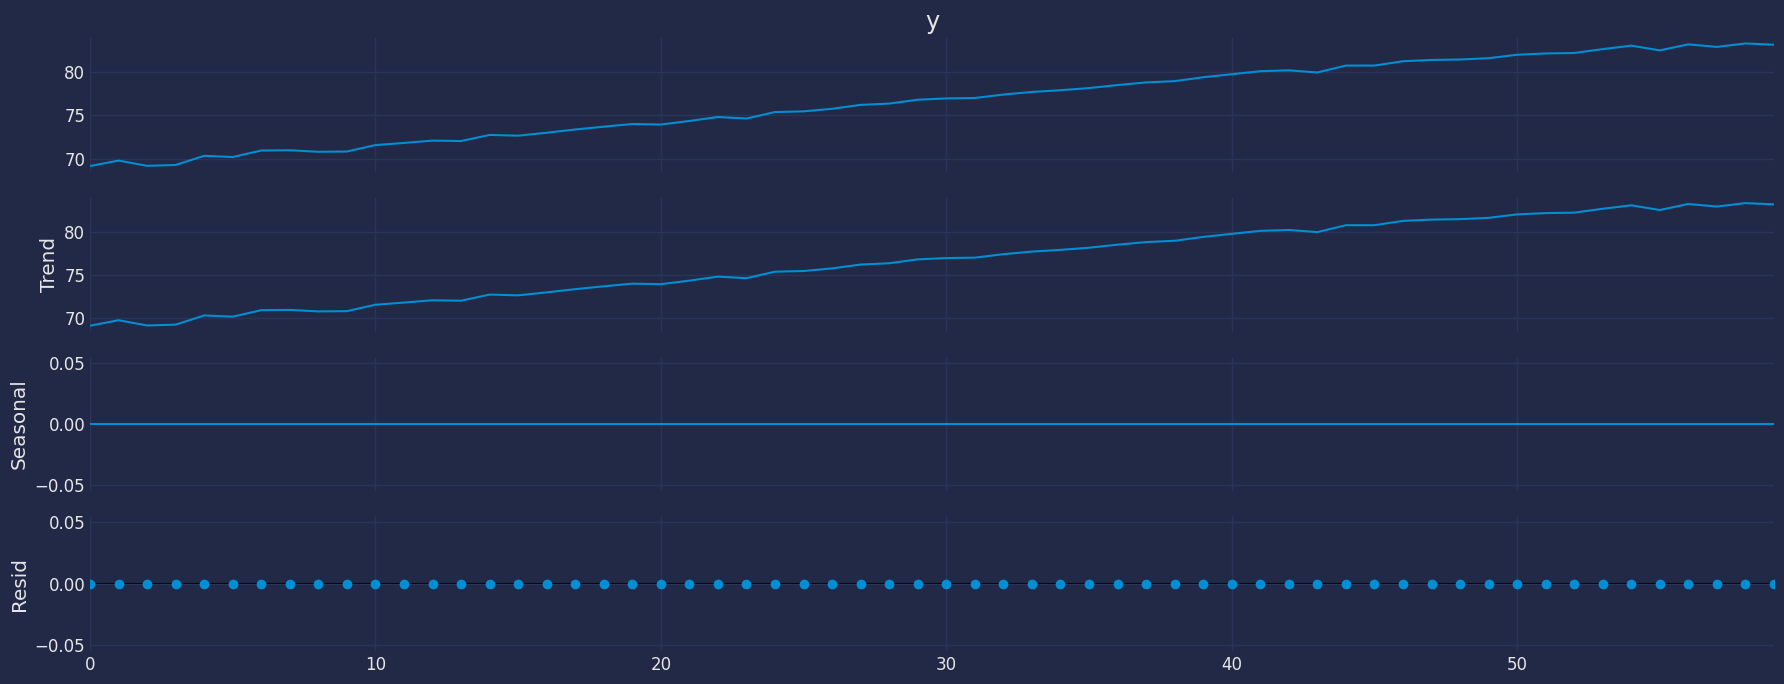

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "add", period=1)
a.plot();

## Split the data into training and testing


In [13]:
train = df[df.ds<='2013-01-01']
test = df[df.ds>'2013-01-01']


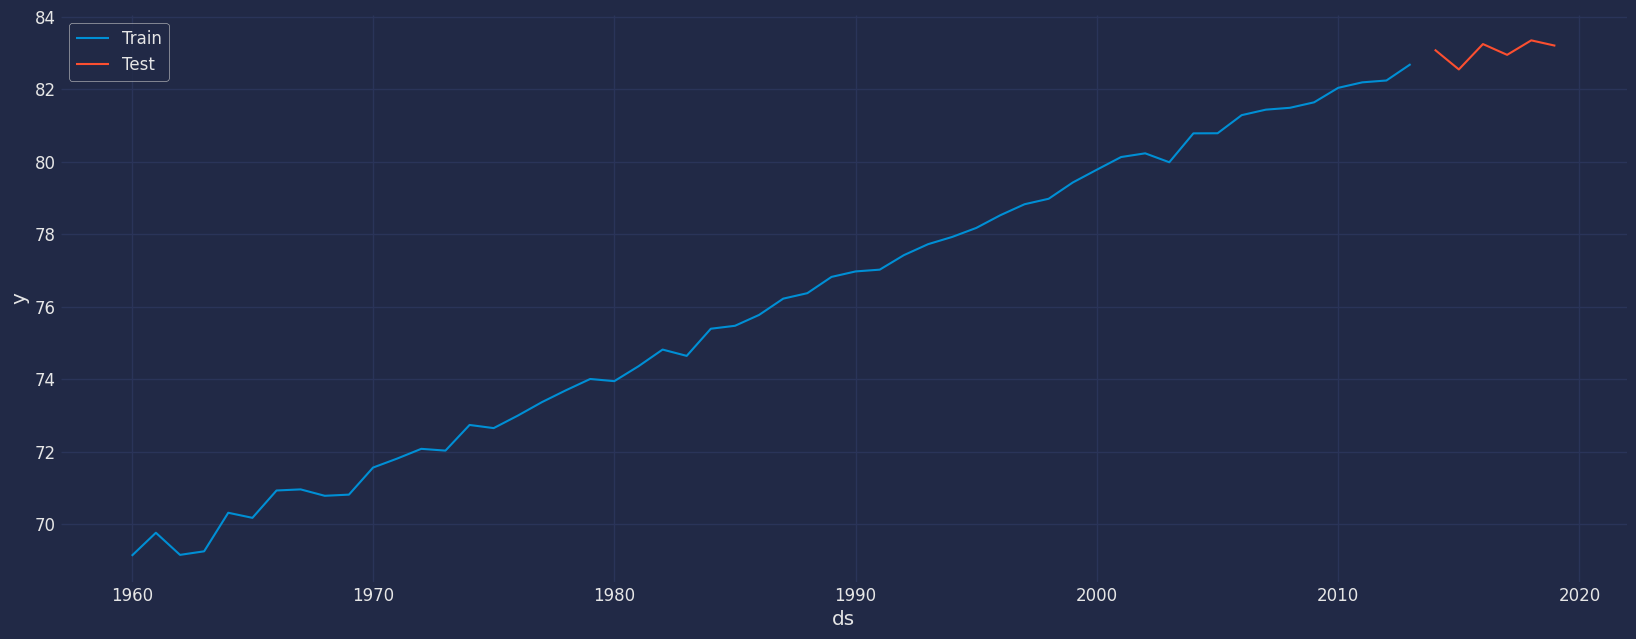

In [14]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()

In [15]:
from statsforecast.models import AutoETS

## Instantiate Model



In [16]:
autoets = AutoETS(model=["A","Z","N"],  alias="AutoETS", season_length=1)


## Fit the model

In [17]:
autoets = autoets.fit(df["y"].values)
autoets


AutoETS

## Model Prediction

In [18]:
y_hat_dict = autoets.predict(h=6)
y_hat_dict

{'mean': array([83.56937105, 83.65696041, 83.74454977, 83.83213913, 83.91972848,
        84.00731784])}

In [20]:
forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast

<ipython-input-20-6d1b8ef58e97>:1: FutureWarning: 'ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  forecast=pd.Series(pd.date_range("2014-01-01", freq="ys", periods=6))


,ds,hat,unique_id
0,2014-01-01,83.569371,1
1,2015-01-01,83.656960,1
2,2016-01-01,83.744550,1
3,2017-01-01,83.832139,1
4,2018-01-01,83.919728,1
5,2019-01-01,84.007318,1


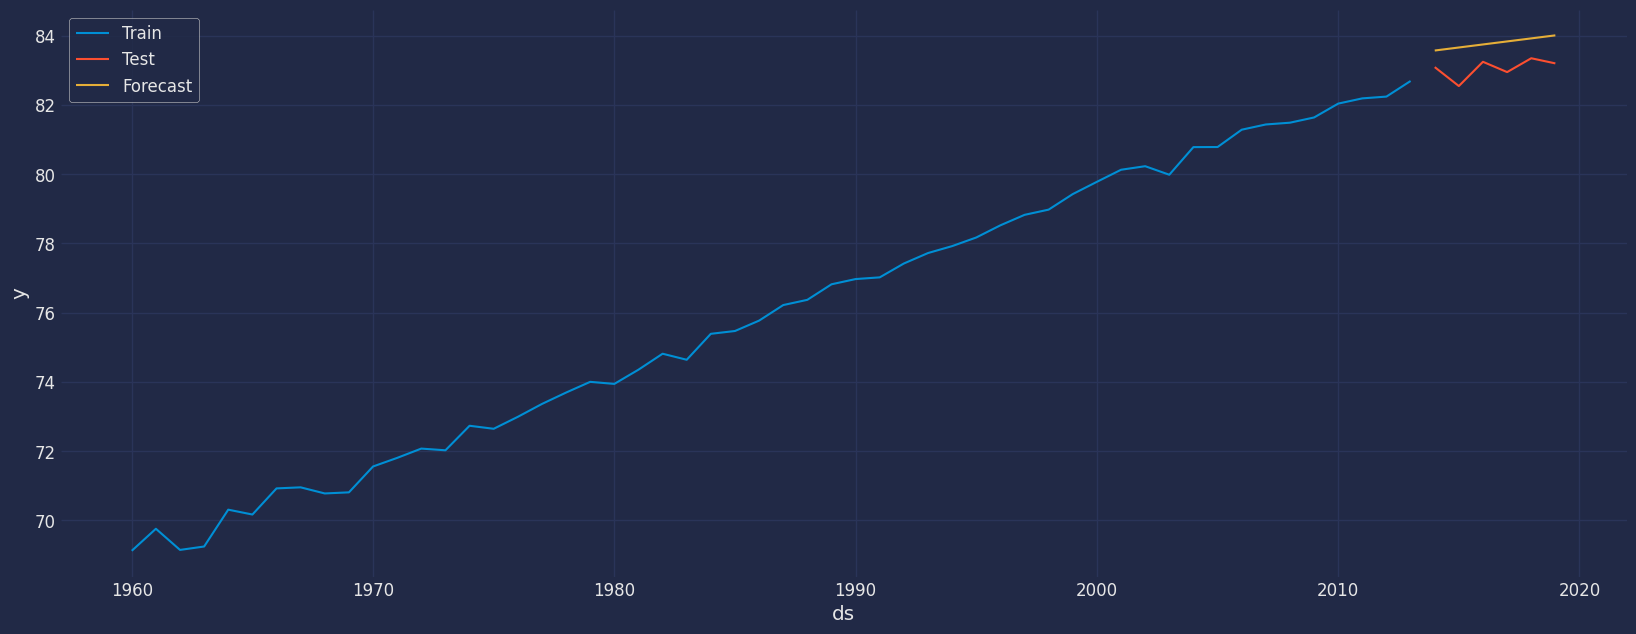

In [21]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

In [22]:
# Agregando intervalos de confianza
y_hat_dict = autoets.predict(h=6, level=[80,90,95])
y_hat_dict


{'mean': array([83.56937105, 83.65696041, 83.74454977, 83.83213913, 83.91972848,
        84.00731784]),
 'lo-95': array([83.09409059, 83.17958519, 83.25889648, 83.32836493, 83.3852606 ,
        83.42814393]),
 'lo-90': array([83.17050311, 83.2563345 , 83.33697668, 83.40935849, 83.4711889 ,
        83.52125977]),
 'lo-80': array([83.25860186, 83.34482153, 83.42699815, 83.50273888, 83.57025872,
        83.62861638]),
 'hi-80': array([83.88014025, 83.96909929, 84.06210139, 84.16153937, 84.26919825,
        84.38601931]),
 'hi-90': array([83.96823899, 84.05758633, 84.15212286, 84.25491976, 84.36826807,
        84.49337591]),
 'hi-95': array([84.04465152, 84.13433563, 84.23020306, 84.33591332, 84.45419637,
        84.58649176])}

In [23]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast

,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2014-01-01,83.569371,1,83.258602,83.880140,83.258602,83.880140,83.094091,84.044652
1,2015-01-01,83.656960,1,83.344822,83.969099,83.344822,83.969099,83.179585,84.134336
2,2016-01-01,83.744550,1,83.426998,84.062101,83.426998,84.062101,83.258896,84.230203
3,2017-01-01,83.832139,1,83.502739,84.161539,83.502739,84.161539,83.328365,84.335913
4,2018-01-01,83.919728,1,83.570259,84.269198,83.570259,84.269198,83.385261,84.454196
5,2019-01-01,84.007318,1,83.628616,84.386019,83.628616,84.386019,83.428144,84.586492


In [24]:
df=df.set_index("ds")
forecast=forecast.set_index("ds")

In [25]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])


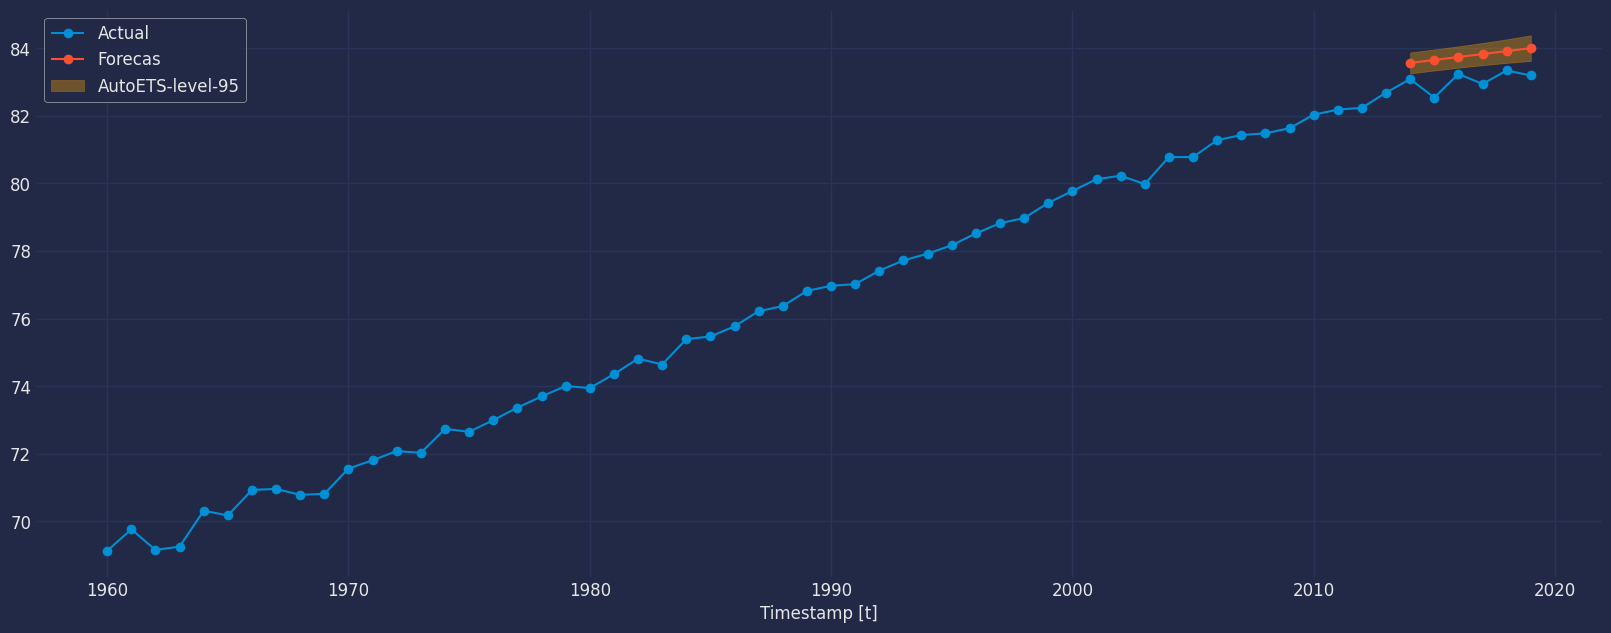

In [26]:

fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index,
                df_plot['lo-80'],
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()


## AutoETS.predict_in_sample method

In [27]:
autoets.predict_in_sample()

{'fitted': array([69.11047128, 69.33779313, 69.60481978, 69.82902341, 69.99867608,
        70.19782129, 70.39447403, 70.6410976 , 70.91730954, 71.18057737,
        71.40921444, 71.65195408, 71.90923238, 72.18210689, 72.44032072,
        72.72619326, 73.00461648, 73.28185885, 73.56688287, 73.86376672,
        74.17369207, 74.4619337 , 74.74004938, 75.02518845, 75.27413727,
        75.53397698, 75.78785822, 76.0401374 , 76.30927822, 76.58417332,
        76.88118063, 77.18657633, 77.47625869, 77.76062769, 78.04136835,
        78.31088961, 78.56725183, 78.81937322, 79.07197167, 79.31551239,
        79.56929831, 79.84269161, 80.14276586, 80.45093604, 80.71510722,
        80.98548038, 81.23680745, 81.49249391, 81.74269063, 81.96870832,
        82.16354077, 82.34648092, 82.51452241, 82.65668891, 82.80204272,
        82.97448067, 83.1064133 , 83.2513209 , 83.36754658, 83.4818162 ])}

## AutoETS.forecast method

In [28]:
autoets.forecast(y=train["y"].values, h=6, fitted=True)

{'mean': array([82.95255312, 83.14614994, 83.33974676, 83.53334358, 83.7269404 ,
        83.92053722]),
 'fitted': array([69.00530476, 69.23734594, 69.49576257, 69.73666618, 69.95294699,
        70.187381  , 70.42098819, 70.68008659, 70.9530876 , 71.21732635,
        71.4611257 , 71.70989361, 71.96354347, 72.2228266 , 72.4721832 ,
        72.73479137, 72.99295904, 73.25108461, 73.51494039, 73.78777897,
        74.07144455, 74.34861549, 74.62606605, 74.91303191, 75.18621304,
        75.46968067, 75.753181  , 76.0375669 , 76.33113266, 76.62667854,
        76.93195155, 77.23916225, 77.53528475, 77.8255869 , 78.1106708 ,
        78.38624159, 78.65095585, 78.90918162, 79.1631414 , 79.40764614,
        79.6530146 , 79.90469107, 80.16756493, 80.43353035, 80.67675051,
        80.9252507 , 81.16655833, 81.41375257, 81.66196432, 81.90126223,
        82.12722125, 82.34863292, 82.56193769, 82.75896317])}

In [29]:
autoets.forecast(y=train["y"].values, h=6, fitted=True, level=[95])

{'mean': array([82.95255312, 83.14614994, 83.33974676, 83.53334358, 83.7269404 ,
        83.92053722]),
 'fitted': array([69.00530476, 69.23734594, 69.49576257, 69.73666618, 69.95294699,
        70.187381  , 70.42098819, 70.68008659, 70.9530876 , 71.21732635,
        71.4611257 , 71.70989361, 71.96354347, 72.2228266 , 72.4721832 ,
        72.73479137, 72.99295904, 73.25108461, 73.51494039, 73.78777897,
        74.07144455, 74.34861549, 74.62606605, 74.91303191, 75.18621304,
        75.46968067, 75.753181  , 76.0375669 , 76.33113266, 76.62667854,
        76.93195155, 77.23916225, 77.53528475, 77.8255869 , 78.1106708 ,
        78.38624159, 78.65095585, 78.90918162, 79.1631414 , 79.40764614,
        79.6530146 , 79.90469107, 80.16756493, 80.43353035, 80.67675051,
        80.9252507 , 81.16655833, 81.41375257, 81.66196432, 81.90126223,
        82.12722125, 82.34863292, 82.56193769, 82.75896317]),
 'lo-95': array([82.50041572, 82.69343721, 82.88474449, 83.07323487, 83.25789375,
        83.4

## AutoETS.forward method

In [30]:
autoets.forward(train["y"].values, h=6)

{'mean': array([82.80204272, 82.94739245, 83.09274218, 83.23809191, 83.38344164,
        83.52879137])}

## Model evaluation

- Mean Absolute Percentage Error (MAPE)

- Mean Error (ME)

- Mean Absolute Error (MAE)

- Mean Percentage Error (MPE)

- Root Mean Squared Error (RMSE)

- Correlation between the Actual and the Forecast (corr)

In [31]:
from sklearn import metrics

In [32]:
def model_evaluation(y_true, y_pred, model):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [33]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")


Model Evaluation: AutoETS
MSE is : 0.5813708311034599
MAE is : 0.7269623342641888
RMSE is : 0.7624767741403405
MAPE is : 0.8759446710136674
R2 is : -7.40712892940391
corr is : 0.4910418089228503

